Importing Libraries and Modules

In [2]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV  #Hyperparameter tuning
import matplotlib.pyplot as plt
import seaborn as sns

Data Collection

In [4]:
# loading the diabetes dataset to a pandas DataFrame
diabetes_dataset = pd.read_csv('Healthcare-Diabetes.csv') 

Data Preprocessing

In [6]:
# printing the first 5 rows of the dataset (to understand data)
diabetes_dataset.head()

,Id,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,1,6,148,72,35,0,33.6,0.627,50,1
1,2,1,85,66,29,0,26.6,0.351,31,0
2,3,8,183,64,0,0,23.3,0.672,32,1
3,4,1,89,66,23,94,28.1,0.167,21,0
4,5,0,137,40,35,168,43.1,2.288,33,1


In [7]:
# getting the statistical measures of the data
diabetes_dataset.describe()

,Id,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000
mean,1384.500000,3.742775,121.102601,69.134393,20.824422,80.127890,32.137392,0.471193,33.132225,0.343931
std,799.197097,3.323801,32.036508,19.231438,16.059596,112.301933,8.076127,0.325669,11.777230,0.475104
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,692.750000,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.244000,24.000000,0.000000
50%,1384.500000,3.000000,117.000000,72.000000,23.000000,37.000000,32.200000,0.375000,29.000000,0.000000
75%,2076.250000,6.000000,141.000000,80.000000,32.000000,130.000000,36.625000,0.624000,40.000000,1.000000
max,2768.000000,17.000000,199.000000,122.000000,110.000000,846.000000,80.600000,2.420000,81.000000,1.000000


In [8]:
diabetes_dataset['Outcome'].value_counts()
# 0=non ; 1=diabetic

Outcome
0    1816
1     952
Name: count, dtype: int64

In [9]:
diabetes_dataset.groupby('Outcome').mean()

,Id,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,,
0,1388.143722,3.204295,110.419604,68.119493,19.945485,70.075991,30.494989,0.433316,31.111233
1,1377.549370,4.769958,141.481092,71.070378,22.501050,99.302521,35.270378,0.543445,36.987395


In [10]:
# Dropping rows where SkinThickness or Insulin is 0
diabetes_dataset = diabetes_dataset[(diabetes_dataset['SkinThickness'] != 0) & (diabetes_dataset['Insulin'] != 0)]

In [11]:
diabetes_dataset['Outcome'].value_counts()

Outcome
0    969
1    467
Name: count, dtype: int64

In [12]:
# Check for missing values in the entire dataset
missing_values = diabetes_dataset.isnull().sum()
print(missing_values)

Id                          0
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [13]:
# Check data types of all columns
data_types = diabetes_dataset.dtypes
print(data_types)

Id                            int64
Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object


In [14]:
# separating the data and labels
X = diabetes_dataset.drop(columns=['Outcome', 'Id'], axis=1) #1=dropping column ; 0=dropping row
Y = diabetes_dataset['Outcome']

In [15]:
print(X)

      Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
3               1       89             66             23       94  28.1   
4               0      137             40             35      168  43.1   
6               3       78             50             32       88  31.0   
8               2      197             70             45      543  30.5   
13              1      189             60             23      846  30.1   
...           ...      ...            ...            ...      ...   ...   
2762            1       79             60             42       48  43.5   
2763            2       75             64             24       55  29.7   
2764            8      179             72             42      130  32.7   
2766            0      129            110             46      130  67.1   
2767            2       81             72             15       76  30.1   

      DiabetesPedigreeFunction  Age  
3                        0.167   21  
4                      

In [16]:
print(Y)

3       0
4       1
6       1
8       1
13      1
       ..
2762    0
2763    0
2764    1
2766    1
2767    0
Name: Outcome, Length: 1436, dtype: int64


In [17]:
# Data Standardization
scaler = StandardScaler()

In [18]:
scaler.fit(X)

StandardScaler()

In [19]:
standardized_data = scaler.transform(X)

In [20]:
print(standardized_data)

[[-0.69418569 -1.07803806 -0.36888421 ... -0.69428559 -1.05267218
  -0.95931663]
 [-1.00924595  0.46347317 -2.42942594 ...  1.36219213  5.1702547
   0.231502  ]
 [-0.06406518 -1.43130105 -1.63690989 ... -0.2966999  -0.81502151
  -0.4631422 ]
 ...
 [ 1.51123611  1.8122955   0.10662542 ... -0.06363242  0.56687315
   0.52920665]
 [-1.00924595  0.20655463  3.11818641 ...  4.65255647 -0.60671042
  -0.4631422 ]
 [-0.37912544 -1.3349566   0.10662542 ... -0.42008856  0.06223221
  -0.56237709]]


In [21]:
X = standardized_data

In [22]:
print(X)
print(Y)

[[-0.69418569 -1.07803806 -0.36888421 ... -0.69428559 -1.05267218
  -0.95931663]
 [-1.00924595  0.46347317 -2.42942594 ...  1.36219213  5.1702547
   0.231502  ]
 [-0.06406518 -1.43130105 -1.63690989 ... -0.2966999  -0.81502151
  -0.4631422 ]
 ...
 [ 1.51123611  1.8122955   0.10662542 ... -0.06363242  0.56687315
   0.52920665]
 [-1.00924595  0.20655463  3.11818641 ...  4.65255647 -0.60671042
  -0.4631422 ]
 [-0.37912544 -1.3349566   0.10662542 ... -0.42008856  0.06223221
  -0.56237709]]
3       0
4       1
6       1
8       1
13      1
       ..
2762    0
2763    0
2764    1
2766    1
2767    0
Name: Outcome, Length: 1436, dtype: int64


Train-Test Split

In [24]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, stratify=Y, random_state=2)
# stratify - 0/1 ; random state for replicating code

In [25]:
print(X.shape, X_train.shape, X_test.shape)

(1436, 8) (1148, 8) (288, 8)


Logistic Regression Model

In [27]:
# Initialize the model
logistic_model = LogisticRegression()

# Train the model
logistic_model.fit(X_train, Y_train)

LogisticRegression()

In [28]:
# Make predictions
train_predictions_logistic = logistic_model.predict(X_train)
# Evaluate the accuracy
train_accuracy_logistic = accuracy_score(Y_train, train_predictions_logistic)
print(f"Accuracy of the Logistic Regression on the train data: {train_accuracy_logistic}")

Accuracy of the Logistic Regression on the train data: 0.7831010452961672


In [29]:
# Make predictions
test_predictions_logistic = logistic_model.predict(X_test)
# Evaluate the accuracy
test_accuracy_logistic = accuracy_score(Y_test, test_predictions_logistic)
print(f"Accuracy of Logistic Regression on the test data: {test_accuracy_logistic}")

Accuracy of Logistic Regression on the test data: 0.78125


Evaluate Logistic Regression Model

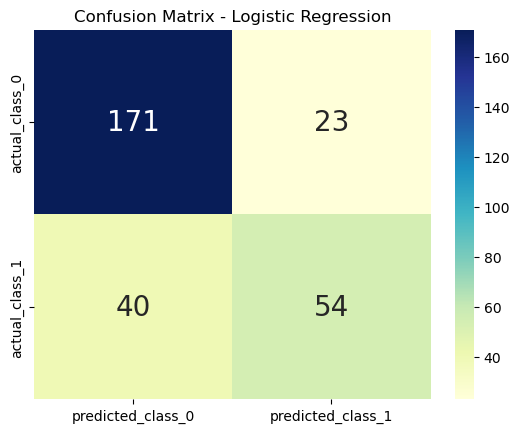

Logistic Regression - Accuracy: 0.7812
Logistic Regression - Precision: 0.7013
Logistic Regression - Recall: 0.5745
Logistic Regression - F1 Score: 0.6316


In [31]:
# Generate predictions
logistic_predictions_test = logistic_model.predict(X_test)

# Compute confusion matrix
cm_logistic = confusion_matrix(Y_test, logistic_predictions_test)
sns.heatmap(cm_logistic, xticklabels=['predicted_class_0', 'predicted_class_1'], yticklabels=['actual_class_0', 'actual_class_1'],
            annot=True, fmt='d', annot_kws={'fontsize':20}, cmap="YlGnBu")
plt.title('Confusion Matrix - Logistic Regression')
plt.show()

# Compute metrics
accuracy_logistic = accuracy_score(Y_test, logistic_predictions_test)
precision_logistic = precision_score(Y_test, logistic_predictions_test)
recall_logistic = recall_score(Y_test, logistic_predictions_test)
f1_logistic = f1_score(Y_test, logistic_predictions_test)

print(f'Logistic Regression - Accuracy: {accuracy_logistic:.4f}')
print(f'Logistic Regression - Precision: {precision_logistic:.4f}')
print(f'Logistic Regression - Recall: {recall_logistic:.4f}')
print(f'Logistic Regression - F1 Score: {f1_logistic:.4f}')


Hyperparameter tuning for Logistic Regression

In [33]:
# Hyperparameter tuning for Logistic Regression using GridSearchCV
param_grid_logistic = {
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'newton-cg', 'lbfgs']
}

grid_search_logistic = GridSearchCV(estimator=LogisticRegression(), param_grid=param_grid_logistic, cv=5, n_jobs=-1, scoring='accuracy')
grid_search_logistic.fit(X_train, Y_train)

best_logistic_model = grid_search_logistic.best_estimator_
print(f"Best parameters for Logistic Regression: {grid_search_logistic.best_params_}")

# Evaluate the tuned Logistic Regression model
train_predictions_logistic = best_logistic_model.predict(X_train)
train_accuracy_logistic = accuracy_score(Y_train, train_predictions_logistic)
print(f"Accuracy of the Tuned Logistic Regression on the train data: {train_accuracy_logistic}")

test_predictions_logistic = best_logistic_model.predict(X_test)
test_accuracy_logistic = accuracy_score(Y_test, test_predictions_logistic)
print(f"Accuracy of the Tuned Logistic Regression on the test data: {test_accuracy_logistic}")

Best parameters for Logistic Regression: {'C': 1, 'solver': 'newton-cg'}
Accuracy of the Tuned Logistic Regression on the train data: 0.7831010452961672
Accuracy of the Tuned Logistic Regression on the test data: 0.78125


Random Forest Model

In [35]:
# Initialize the model
rf_model = RandomForestClassifier(n_estimators=100, random_state=2)

# Train the model
rf_model.fit(X_train, Y_train)

RandomForestClassifier(random_state=2)

In [36]:
# Make predictions
train_predictions_rf = rf_model.predict(X_train)

# Evaluate the accuracy
train_accuracy_rf = accuracy_score(Y_train, train_predictions_rf)
print(f"Accuracy of the Random Forest on the train data: {train_accuracy_rf}")

Accuracy of the Random Forest on the train data: 1.0


In [37]:
# Make predictions
test_predictions_rf = rf_model.predict(X_test)

# Evaluate the accuracy
test_accuracy_rf = accuracy_score(Y_test, test_predictions_rf)
print(f"Accuracy of the Random Forest on the test data: {test_accuracy_rf}")

Accuracy of the Random Forest on the test data: 0.9895833333333334


Evaluate Random Forest Model

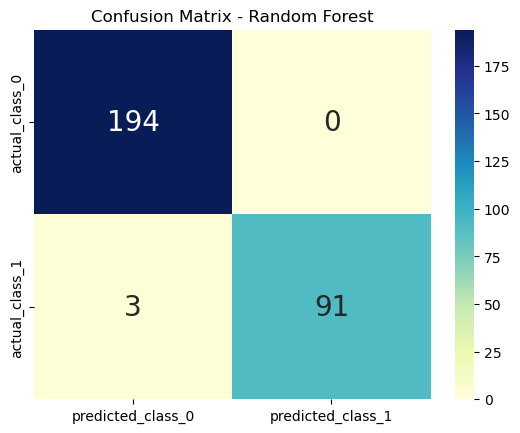

Random Forest - Accuracy: 0.9896
Random Forest - Precision: 1.0000
Random Forest - Recall: 0.9681
Random Forest - F1 Score: 0.9838


In [39]:
# Generate predictions
rf_predictions_test = rf_model.predict(X_test)

# Compute confusion matrix
cm_rf = confusion_matrix(Y_test, rf_predictions_test)
sns.heatmap(cm_rf, xticklabels=['predicted_class_0', 'predicted_class_1'], yticklabels=['actual_class_0', 'actual_class_1'],
            annot=True, fmt='d', annot_kws={'fontsize':20}, cmap="YlGnBu")
plt.title('Confusion Matrix - Random Forest')
plt.show()

# Compute metrics
accuracy_rf = accuracy_score(Y_test, rf_predictions_test)
precision_rf = precision_score(Y_test, rf_predictions_test)
recall_rf = recall_score(Y_test, rf_predictions_test)
f1_rf = f1_score(Y_test, rf_predictions_test)

print(f'Random Forest - Accuracy: {accuracy_rf:.4f}')
print(f'Random Forest - Precision: {precision_rf:.4f}')
print(f'Random Forest - Recall: {recall_rf:.4f}')
print(f'Random Forest - F1 Score: {f1_rf:.4f}')


Hyperparameter tuning for Random Forest

In [41]:
param_grid_rf = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

grid_search_rf = GridSearchCV(estimator=rf_model, param_grid=param_grid_rf, cv=3, n_jobs=-1, scoring='accuracy')
grid_search_rf.fit(X_train, Y_train)

best_rf_model = grid_search_rf.best_estimator_
print(f"Best parameters for Random Forest: {grid_search_rf.best_params_}")

# Evaluate the tuned Random Forest model
train_predictions_rf_tuned = best_rf_model.predict(X_train)
train_accuracy_rf_tuned = accuracy_score(Y_train, train_predictions_rf_tuned)
print(f"Accuracy of Tuned Random Forest on the train data: {train_accuracy_rf_tuned}")

test_predictions_rf_tuned = best_rf_model.predict(X_test)
test_accuracy_rf_tuned = accuracy_score(Y_test, test_predictions_rf_tuned)
print(f"Accuracy of Tuned Random Forest on the test data: {test_accuracy_rf_tuned}")

Best parameters for Random Forest: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 150}
Accuracy of Tuned Random Forest on the train data: 1.0
Accuracy of Tuned Random Forest on the test data: 0.9895833333333334


Support Vector Machine (SVM) Model

In [43]:
#Training the Model
svm_model = svm.SVC(kernel='linear')

In [44]:
#training the support vector Machine Classifier
svm_model.fit(X_train, Y_train)

SVC(kernel='linear')

In [45]:
# Model Evaluation
# accuracy score on the training data
train_prediction_svm = svm_model.predict(X_train)
train_accuracy_svm = accuracy_score(train_prediction_svm, Y_train)

print('Accuracy of the Support Vector Machine on the train data: ', train_accuracy_svm)

Accuracy of the Support Vector Machine on the train data:  0.7909407665505227


In [46]:
# accuracy score on the test data
test_prediction_svm = svm_model.predict(X_test)
test_accuracy_svm = accuracy_score(test_prediction_svm, Y_test)

print('Accuracy of the Support Vector Machine on the test data: ', test_accuracy_svm)

Accuracy of the Support Vector Machine on the test data:  0.78125


No overfitting ^


Evaluate Support Vector Machine (SVM) Model

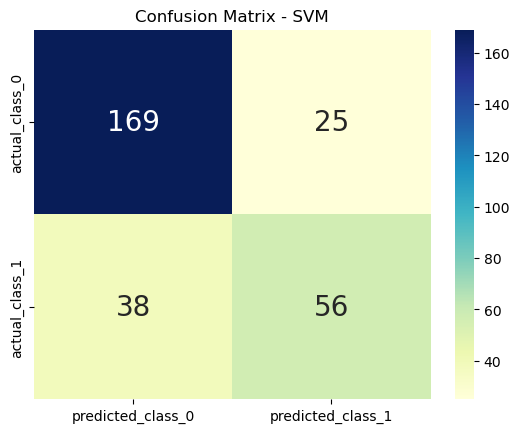

SVM - Accuracy: 0.7812
SVM - Precision: 0.6914
SVM - Recall: 0.5957
SVM - F1 Score: 0.6400


In [49]:
# Generate predictions
svm_predictions_test = svm_model.predict(X_test)

# Compute confusion matrix
cm_svm = confusion_matrix(Y_test, svm_predictions_test)
sns.heatmap(cm_svm, xticklabels=['predicted_class_0', 'predicted_class_1'], yticklabels=['actual_class_0', 'actual_class_1'],
            annot=True, fmt='d', annot_kws={'fontsize':20}, cmap="YlGnBu")
plt.title('Confusion Matrix - SVM')
plt.show()

# Compute metrics
accuracy_svm = accuracy_score(Y_test, svm_predictions_test)
precision_svm = precision_score(Y_test, svm_predictions_test)
recall_svm = recall_score(Y_test, svm_predictions_test)
f1_svm = f1_score(Y_test, svm_predictions_test)

print(f'SVM - Accuracy: {accuracy_svm:.4f}')
print(f'SVM - Precision: {precision_svm:.4f}')
print(f'SVM - Recall: {recall_svm:.4f}')
print(f'SVM - F1 Score: {f1_svm:.4f}')


Hyperparameter tuning for Support Vector Machine

In [51]:
param_grid_svm = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}
grid_search_svm = GridSearchCV(estimator=svm_model, param_grid=param_grid_svm, cv=3, n_jobs=-1, scoring='accuracy')
grid_search_svm.fit(X_train, Y_train)

best_svm_model = grid_search_svm.best_estimator_
print(f"Best parameters for SVM: {grid_search_svm.best_params_}")

# Evaluate the tuned SVM model
train_predictions_svm_tuned = best_svm_model.predict(X_train)
train_accuracy_svm_tuned = accuracy_score(Y_train, train_predictions_svm_tuned)
print(f"Accuracy of Tuned SVM on the train data: {train_accuracy_svm_tuned}")

test_predictions_svm_tuned = best_svm_model.predict(X_test)
test_accuracy_svm_tuned = accuracy_score(Y_test, test_predictions_svm_tuned)
print(f"Accuracy of Tuned SVM on the test data: {test_accuracy_svm_tuned}")

Best parameters for SVM: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
Accuracy of Tuned SVM on the train data: 0.9634146341463414
Accuracy of Tuned SVM on the test data: 0.9027777777777778


Model Comparison

In [53]:
# Define the models and their accuracies
models = ['Logistic Regression', 'Random Forest', 'SVM']
training_accuracy_before_tuning = [train_accuracy_logistic*100, train_accuracy_rf*100, train_accuracy_svm*100]
test_accuracy_before_tuning = [test_accuracy_logistic*100, test_accuracy_rf*100, test_accuracy_svm*100]
training_accuracy_after_tuning = [train_accuracy_logistic*100, train_accuracy_rf_tuned*100, train_accuracy_svm_tuned*100]
test_accuracy_after_tuning = [test_accuracy_logistic*100, test_accuracy_rf_tuned*100, test_accuracy_svm_tuned*100]

# Create a DataFrame for easy plotting
data = {
    'Model': models * 2 * 2,  # Each model will appear 4 times (train/before, test/before, train/after, test/after)
    'Dataset': ['Train (Before Tuning)'] * len(models) + 
               ['Test (Before Tuning)'] * len(models) +
               ['Train (After Tuning)'] * len(models) +
               ['Test (After Tuning)'] * len(models),
    'Accuracy (%)': training_accuracy_before_tuning + 
                    test_accuracy_before_tuning + 
                    training_accuracy_after_tuning + 
                    test_accuracy_after_tuning
}

df = pd.DataFrame(data)

print(df)

                  Model                Dataset  Accuracy (%)
0   Logistic Regression  Train (Before Tuning)     78.310105
1         Random Forest  Train (Before Tuning)    100.000000
2                   SVM  Train (Before Tuning)     79.094077
3   Logistic Regression   Test (Before Tuning)     78.125000
4         Random Forest   Test (Before Tuning)     98.958333
5                   SVM   Test (Before Tuning)     78.125000
6   Logistic Regression   Train (After Tuning)     78.310105
7         Random Forest   Train (After Tuning)    100.000000
8                   SVM   Train (After Tuning)     96.341463
9   Logistic Regression    Test (After Tuning)     78.125000
10        Random Forest    Test (After Tuning)     98.958333
11                  SVM    Test (After Tuning)     90.277778


Visualization

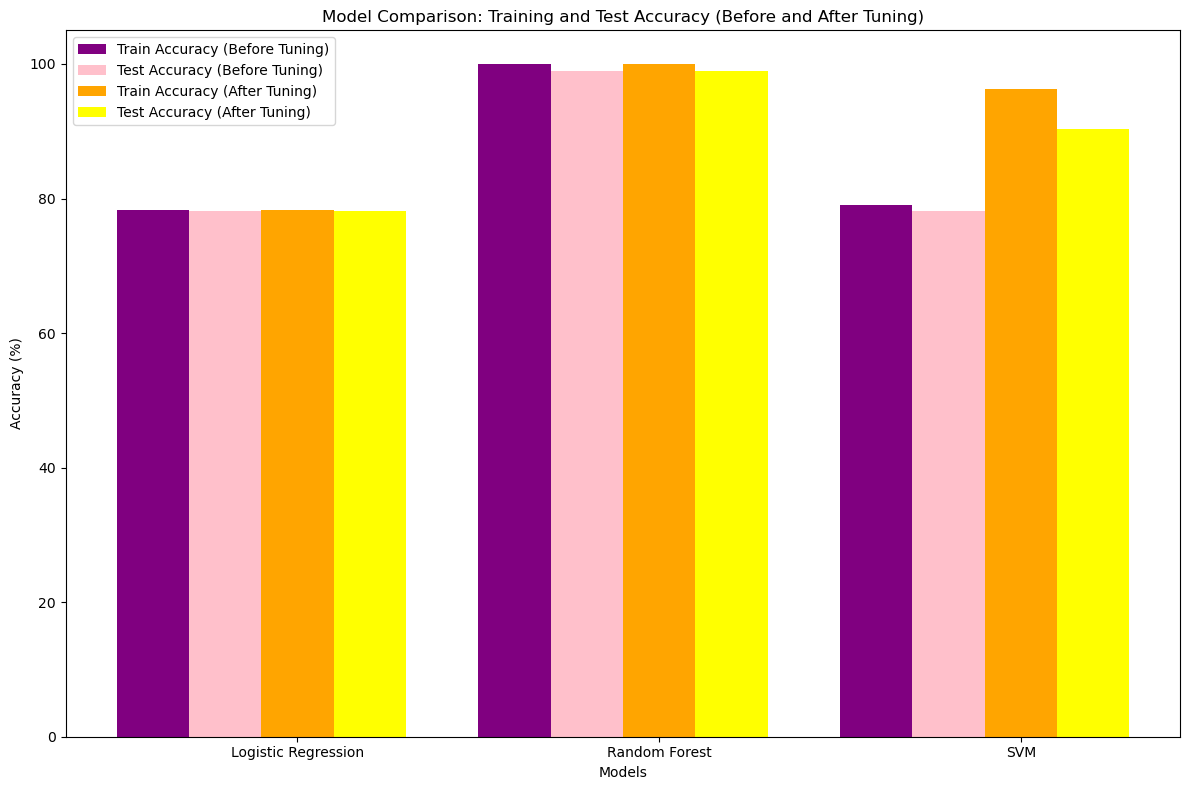

In [55]:
# Set up the figure and axis
fig, ax = plt.subplots(figsize=(12, 8))

# Define the positions and width for the bars
bar_width = 0.2
index = np.arange(len(models))

# Plot bars for training accuracy before tuning with green color
bar1 = ax.bar(index - bar_width, training_accuracy_before_tuning, bar_width, color='purple', label='Train Accuracy (Before Tuning)')

# Plot bars for test accuracy before tuning with blue color
bar2 = ax.bar(index, test_accuracy_before_tuning, bar_width, color='pink', label='Test Accuracy (Before Tuning)')

# Plot bars for training accuracy after tuning with purple color
bar3 = ax.bar(index + bar_width, training_accuracy_after_tuning, bar_width, color='orange', label='Train Accuracy (After Tuning)')

# Plot bars for test accuracy after tuning with pink color
bar4 = ax.bar(index + 2 * bar_width, test_accuracy_after_tuning, bar_width, color='yellow', label='Test Accuracy (After Tuning)')

# Add labels, title, and legend
ax.set_xlabel('Models')
ax.set_ylabel('Accuracy (%)')
ax.set_title('Model Comparison: Training and Test Accuracy (Before and After Tuning)')
ax.set_xticks(index + bar_width)
ax.set_xticklabels(models)
ax.legend()

# Display the plot
plt.tight_layout()
plt.show()


Making a Predictive System

In [57]:
#input_data = (4,110,92,20,10,37.6,0.191,30)
input_data = (1,89,66,23,94,28.1,0.167,21)

# Assuming your feature names are known
feature_names = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

# Convert input_data to a DataFrame
input_data_df = pd.DataFrame([input_data], columns=feature_names)

# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

# standardize the input data
std_data = scaler.transform(input_data_df)
#print(std_data)

prediction = rf_model.predict(std_data)
print(prediction)

if (prediction[0] == 0):
  print('The person is not diabetic')
else:
  print('The person is diabetic')

[0]
The person is not diabetic


Saving the trained model

In [59]:
import pickle

In [60]:
filename = 'trained_model.sav'
pickle.dump(rf_model, open(filename, 'wb'))

In [61]:
# loading the saved model
loaded_model = pickle.load(open('trained_model.sav', 'rb'))

In [62]:
# Save the scaler object to a file
with open('scaler.sav', 'wb') as f:
    pickle.dump(scaler, f)

In [63]:
#input_data = (5,166,72,19,175,25.8,0.587,51)

input_data = (1,85,66,29,0,26.6,0.351,31)
#input_data = (1,89,66,23,94,28.1,0.167,21)

# Assuming your feature names are known
feature_names = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

# Convert input_data to a DataFrame
input_data_df = pd.DataFrame([input_data], columns=feature_names)

# changing the input_data to numpy array
#input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
#input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

# standardize the input data
std_data = scaler.transform(input_data_df)

prediction = loaded_model.predict(std_data)
print(prediction)

if (prediction[0] == 0):
  print('The person is not diabetic')
else:
  print('The person is diabetic')

[0]
The person is not diabetic
